# PCA of US Treasuries yield curve

In [1]:
#!pip install Quandl
import numpy as np
from pca_wrapper import *
from datetime import datetime
import quandl
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
plt.style.use('dark_background')

In [2]:
params = {
    'font.size': 14,
    'figure.figsize': (14,7),
    'xtick.labelsize': 12,
    'lines.markersize': 2,
}
plt.rcParams.update(params)

ONE_PCT = 1e-2
N_COMPONENTS = 3

pca = PCA_wrapper(n_components=N_COMPONENTS)

# 2017-2019 flattening

In [3]:
START_DATE = datetime(2017,1,18)
END_DATE = datetime(2019,1,14)

## Query Quandl and clean data

In [4]:
df = quandl.get("FED/SVENY", authtoken="Mn11_JRws2o-D5E9CGzc")*ONE_PCT
df = df[df.index>=START_DATE]
df = df[df.index<=END_DATE]
new_names = [s.replace('SVENY', '') + 'Y' for s in df.columns]
df.rename(columns=dict(zip(df.columns, new_names)), inplace=True)

## Yield curves

Massive flattening in the front-end : short-term rates are rising (end of Fed stimulus).

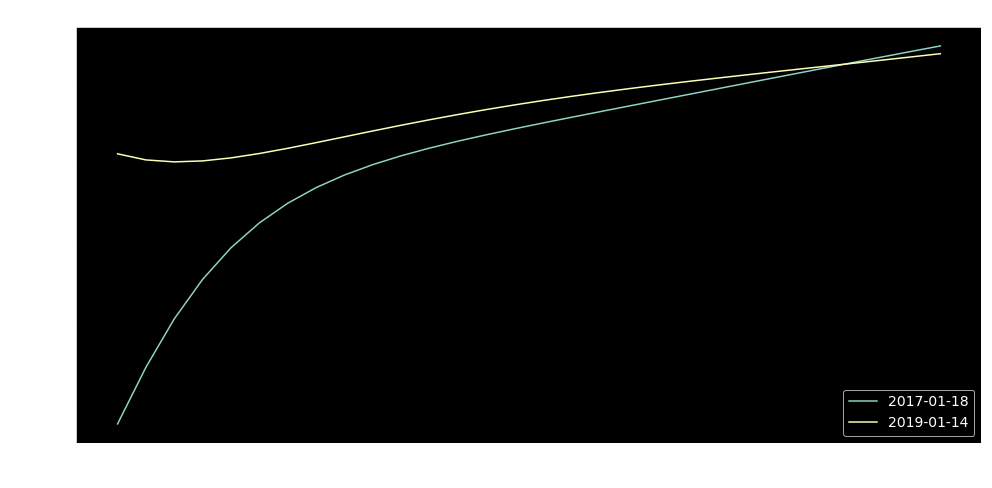

In [5]:
ig, ax = plt.subplots(nrows=1, ncols=1)
data_start = df.loc[START_DATE]
data_end = df.loc[END_DATE]
ax.plot(data_start, label=START_DATE.date())
ax.plot(data_end, label=END_DATE.date())
ax.set_xlabel('Tenor')
ax.set_ylabel('Yield')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.2%}'.format(x)))
ax.set_title('Yield curve between {} and {}'.format(START_DATE.date(), END_DATE.date()))
ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

## PCA

In [6]:
pca.df = df
pca.summary_variance()

Component 1 : 90.40%
Component 2 : 8.65%
Component 3 : 0.88%
Total explained variance : 99.92%


### First component 
All variables (i.e term structure from 1Y to 30Y) are positively correlated with the first principal component, the more so for the short term rates : this component captures the parallel shift of the curve.

The most correlated variable is the 2Y point rather than the 1Y : this hints at the curve inversion one can see at the front-end of the 2019 curve.

### Second component 
The back-end is positively correlated with the second component, the front-end is moving in opposite direction. The second component captures the slope of the curve deformation (here a flattening).

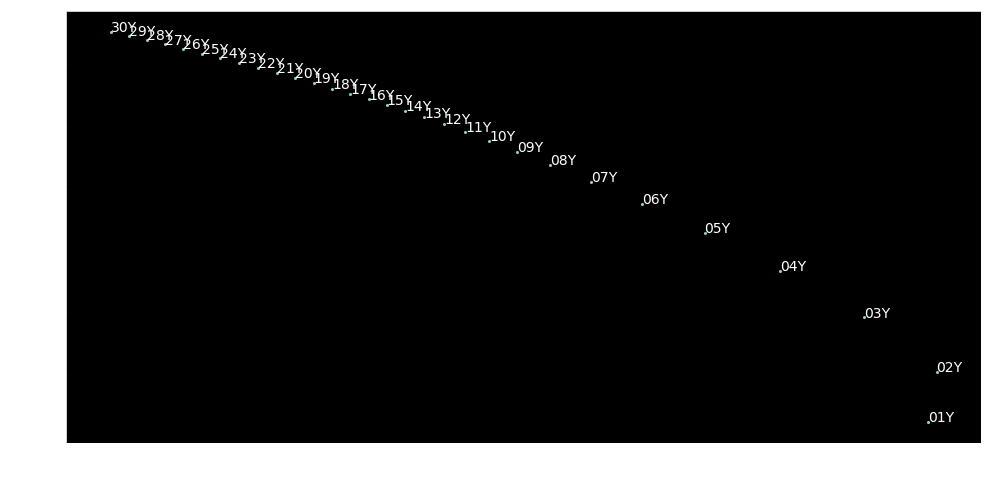

In [7]:
pca.plot_pca_2d_variables(i=1, j=2)

### Third component 
Strong positive correlation in the front-end, small positive correlation in the back-end, independance in the belly of the curve: the third component is a convexity component.

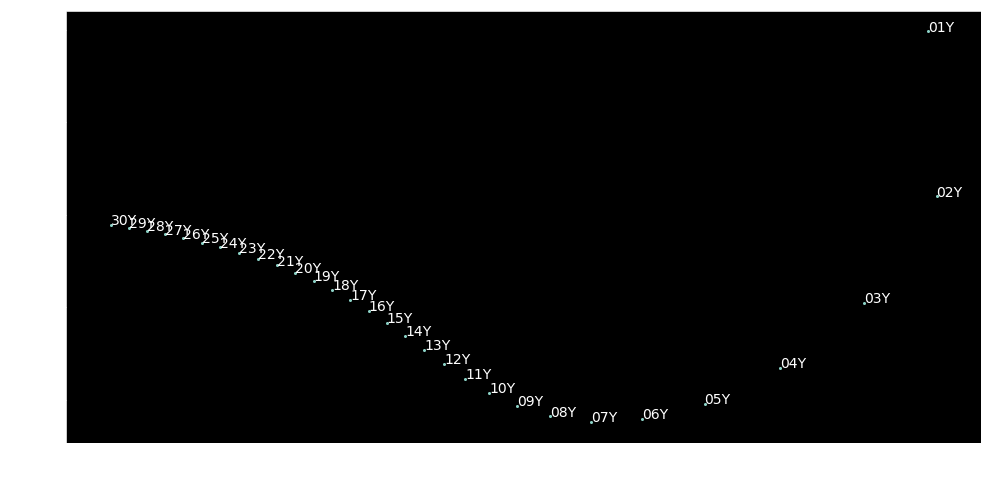

In [8]:
pca.plot_pca_2d_variables(i=1, j=3)

### Projection of datapoints on the first components
Clear pattern through time : shift towards higher first component as rates are rising.

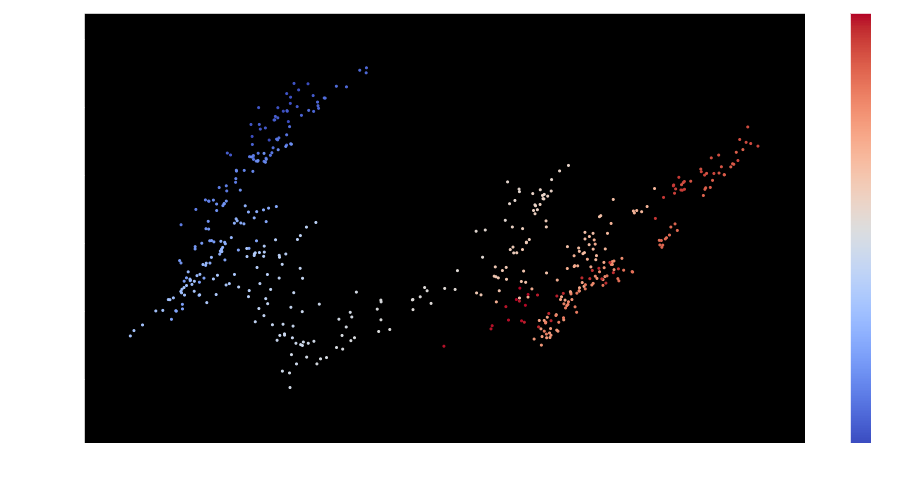

In [9]:
pca.plot_pca_2d_population(i=1, j=2)

# 2013-2015 curvature change

In [10]:
START_DATE = datetime(2013,1,22)
END_DATE = datetime(2015,1,13)

## Query Quandl and clean data

In [11]:
df = quandl.get("FED/SVENY", authtoken="Mn11_JRws2o-D5E9CGzc")*ONE_PCT
df = df[df.index>=START_DATE]
df = df[df.index<=END_DATE]
new_names = [s.replace('SVENY', '') + 'Y' for s in df.columns]
df.rename(columns=dict(zip(df.columns, new_names)), inplace=True)

## Yield curves
Steepening of the back-end, flattening of the back-end

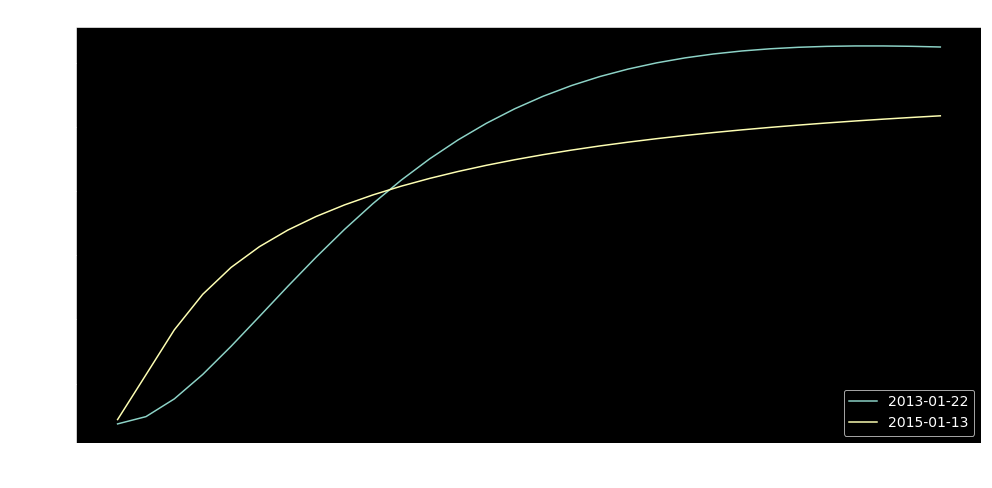

In [12]:
ig, ax = plt.subplots(nrows=1, ncols=1)
data_start = df.loc[START_DATE]
data_end = df.loc[END_DATE]
ax.plot(data_start, label=START_DATE.date())
ax.plot(data_end, label=END_DATE.date())
ax.set_xlabel('Tenor')
ax.set_ylabel('Yield')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.2%}'.format(x)))
ax.set_title('Yield curve between {} and {}'.format(START_DATE.date(), END_DATE.date()))
ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

## PCA

In [13]:
pca.df = df
pca.summary_variance()

Component 1 : 83.84%
Component 2 : 15.92%
Component 3 : 0.11%
Total explained variance : 99.87%


### First component 
All variables (i.e term structure from 1Y to 30Y) are negatively correlated with the first principal component, the more so for the long term rates : this component captures the parallel shift of the curve.

The 1Y and 2Y exhibit a small positive dependance to this component as front-end rates are rising.

### Second component 
The back-end is negatively correlated with the second component, the front-end is insensitive, the belly of the curve is stronly correlated. 

This captures the increasing/decreasing slope before/after the 10Y point.

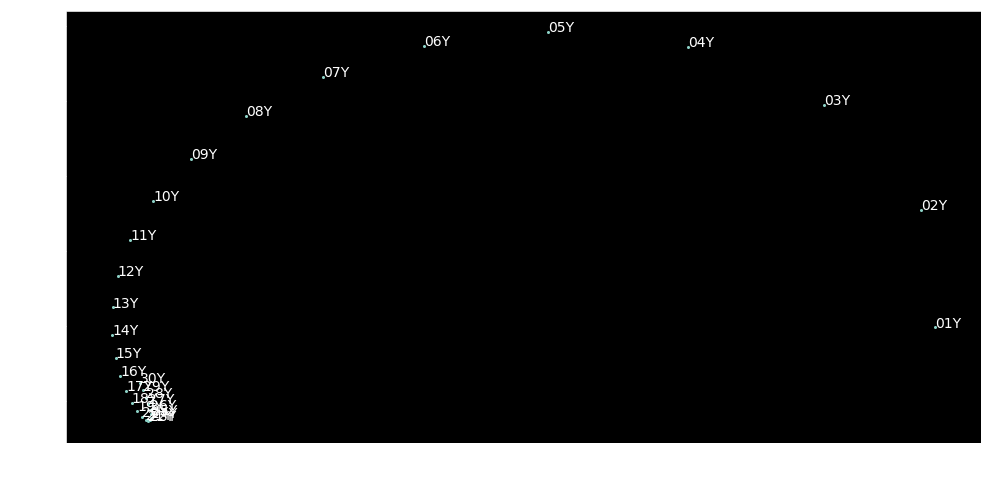

In [14]:
pca.plot_pca_2d_variables(i=1, j=2)

### Third component 
Strong positive correlation in the front-end : this captures the curvature increase in the yield curve.

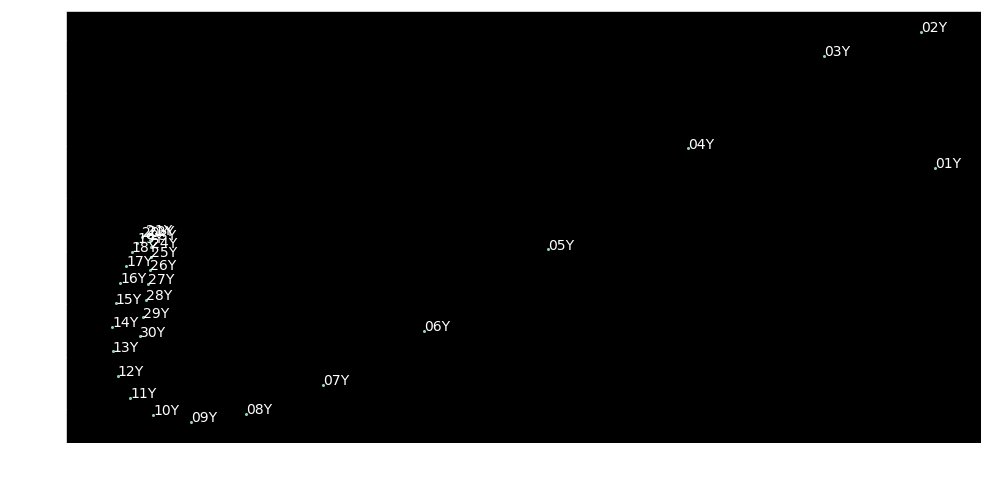

In [15]:
pca.plot_pca_2d_variables(i=1, j=3)

### Projection of datapoints on the first components

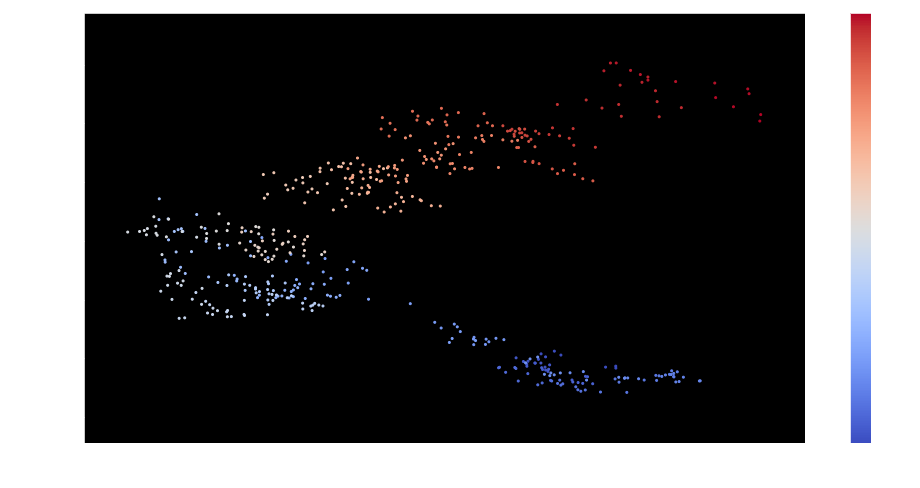

In [16]:
pca.plot_pca_2d_population(i=1, j=2)